### Import Libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Load excel file

In [178]:
df = pd.read_excel('orderdataset.xlsx')
df.head(5) # first five rows

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-05-09 00:00:00,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-05-09 00:00:00,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-05-09 00:00:00,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-03-10 00:00:00,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-03-10 00:00:00,e-wallet,fashion,500.0


In [179]:
print(df.dtypes)

order_id                  object
quantity                   int64
product_id                object
price                      int64
seller_id                 object
freight_value              int64
customer_id               object
order_status              object
purchase_date             object
payment_type              object
product_category_name     object
product_weight_gram      float64
dtype: object


In [180]:
print(df.count())

order_id                 49999
quantity                 49999
product_id               49999
price                    49999
seller_id                49999
freight_value            49999
customer_id              49999
order_status             49999
purchase_date            49999
payment_type             49999
product_category_name    49999
product_weight_gram      49980
dtype: int64


# Exploratory Data Analysis

### Data Cleaning and Preparation

In [181]:
# Handle missing values and ensure consistency
df.isnull().sum() # product_weight_gram has 19 missing values

order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64

In [182]:
# Display rows with missing values
rows_missing_values = df[df.isnull().any(axis=1)]
print("Row With Missing Value:\n", rows_missing_values)

Row With Missing Value:
                                order_id  quantity  \
1193   85f8ad45e067abd694b627859fa57453         1   
5624   eb855beb3ac99461f7a076b4c3652472         1   
6284   a2456e7f02197951664897a94c87242d         1   
6312   e3daea0200104991cb979c2fcc509ae7         1   
6433   6f497c40431d5fb0cfbd6c943dd29215         1   
6480   1521c6bb7b1028154c8c67cf80fa809f         1   
6499   415cfaaaa8cea49f934470548797fed1         2   
6500   415cfaaaa8cea49f934470548797fed1         1   
6555   101157d4fae1c9fb74a00a5dee265c25         1   
7046   c1424efcde3c9e9febd9e1761667789e         1   
8452   ddf16d77e858a32f36e10c289a28ef61         1   
8453   ddf16d77e858a32f36e10c289a28ef61         1   
14008  d38dcb503cd4ddc6ce7702552918bd8f         2   
14009  d38dcb503cd4ddc6ce7702552918bd8f         1   
16301  6e150190fbe04c642a9cf0b80d83ee16         1   
17353  bf49f84a0580ef6751e13357776b7ed9         1   
18183  bbfc7badbed2f1828e22b6d629201bd4         1   
23218  595316a07cd3de

In [183]:
# drop rows with missing values
df.dropna(inplace=True)
# drop duplicates
df.drop_duplicates(inplace=True)
# recheck missing values
df.isnull().sum()

order_id                 0
quantity                 0
product_id               0
price                    0
seller_id                0
freight_value            0
customer_id              0
order_status             0
purchase_date            0
payment_type             0
product_category_name    0
product_weight_gram      0
dtype: int64

In [184]:
df.count()

order_id                 49980
quantity                 49980
product_id               49980
price                    49980
seller_id                49980
freight_value            49980
customer_id              49980
order_status             49980
purchase_date            49980
payment_type             49980
product_category_name    49980
product_weight_gram      49980
dtype: int64

In [185]:
# Convert 'purchase_date' column to datetime format
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format='%d/%m/%Y')

In [186]:
print(df.dtypes)

order_id                         object
quantity                          int64
product_id                       object
price                             int64
seller_id                        object
freight_value                     int64
customer_id                      object
order_status                     object
purchase_date            datetime64[ns]
payment_type                     object
product_category_name            object
product_weight_gram             float64
dtype: object


## Statistical Analysis

In [187]:
# Descriptive statistics
summary_stat = df.describe()
print(summary_stat)

           quantity         price  freight_value  \
count  49980.000000  4.998000e+04   49980.000000   
mean       1.197519  2.607874e+06  104518.707483   
min        1.000000  2.000000e+05    9000.000000   
25%        1.000000  1.411000e+06   57000.000000   
50%        1.000000  2.610000e+06  104000.000000   
75%        1.000000  3.810000e+06  152000.000000   
max       21.000000  5.000000e+06  200000.000000   
std        0.722372  1.388282e+06   55180.931697   

                       purchase_date  product_weight_gram  
count                          49980         49980.000000  
mean   2017-07-20 16:42:00.432172800          2201.830892  
min              2016-03-10 00:00:00            50.000000  
25%              2017-05-05 00:00:00           300.000000  
50%              2017-08-02 00:00:00           800.000000  
75%              2017-10-21 00:00:00          1850.000000  
max              2017-12-15 00:00:00         40425.000000  
std                              NaN          3929.

In [188]:
# Total sales
total_sales = df['price'].sum()

# Average sales
average_sales = df['price'].mean()

# Minimum sales
min_sale = df['price'].min()

# Miximum sales
max_sale = df['price'].max()

print('Total Sales is :', total_sales)
print('Average Sale Price is:', average_sales)
print('Minimum Sale Price is:', min_sale)
print('Maximum Sale Price is:', max_sale)

Total Sales is : 130341531000
Average Sale Price is: 2607873.769507803
Minimum Sale Price is: 200000
Maximum Sale Price is: 5000000


In [189]:
# Group data by year and count the number of transactions
df['year'] = df['purchase_date'].dt.year
transactions_per_year = df.groupby('year').size()
print("Number of transactions per year:")
print(transactions_per_year)
df["month"] = df["purchase_date"].dt.day
df.head(2)

Number of transactions per year:
year
2016      372
2017    49608
dtype: int64


,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram,year,month
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-05-09,virtual account,fashion,1800.0,2016,9
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-05-09,virtual account,automotive,1400.0,2016,9


In [190]:
# Get the number of transactions for 2016 and 2017
transactions_2016 = transactions_per_year.get(2016, 0)
transactions_2017 = transactions_per_year.get(2017, 0)
print("\nNumber of transactions in 2016:", transactions_2016)
print("Number of transactions in 2017:", transactions_2017)


Number of transactions in 2016: 372
Number of transactions in 2017: 49608


Number of orders for each status:
order_status
delivered      48645
shipped          567
processing       270
canceled         267
invoiced         221
unavailable        7
approved           3
Name: count, dtype: int64


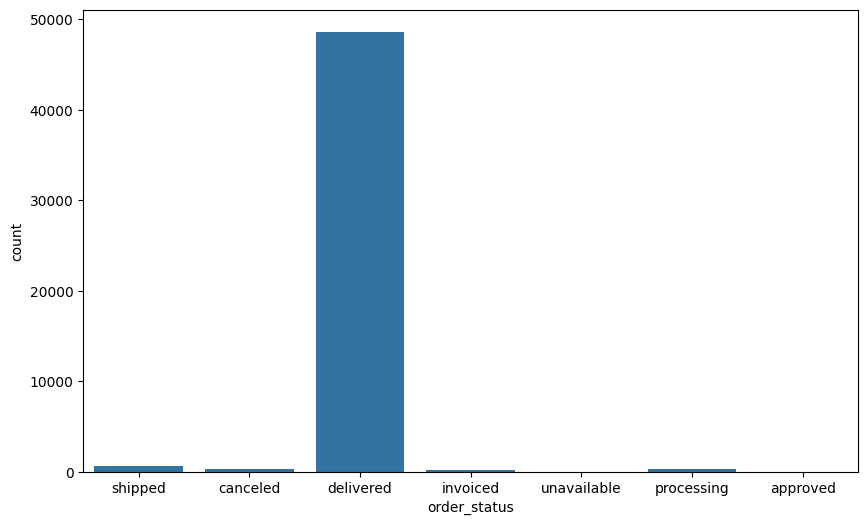

In [191]:
# Number of orders for each status
order_status_counts = df['order_status'].value_counts()
print("Number of orders for each status:")
print(order_status_counts)
plt.figure(figsize=(10, 6))
# Bar chart for order status distribution
sns.countplot(x='order_status', data=df)
plt.show()

Number of payment types based on category:
payment_type
virtual account    12579
credit card        12492
debit card         12465
e-wallet           12444
Name: count, dtype: int64


C:\Users\Naveed\AppData\Local\Temp\ipykernel_35408\3206046351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')


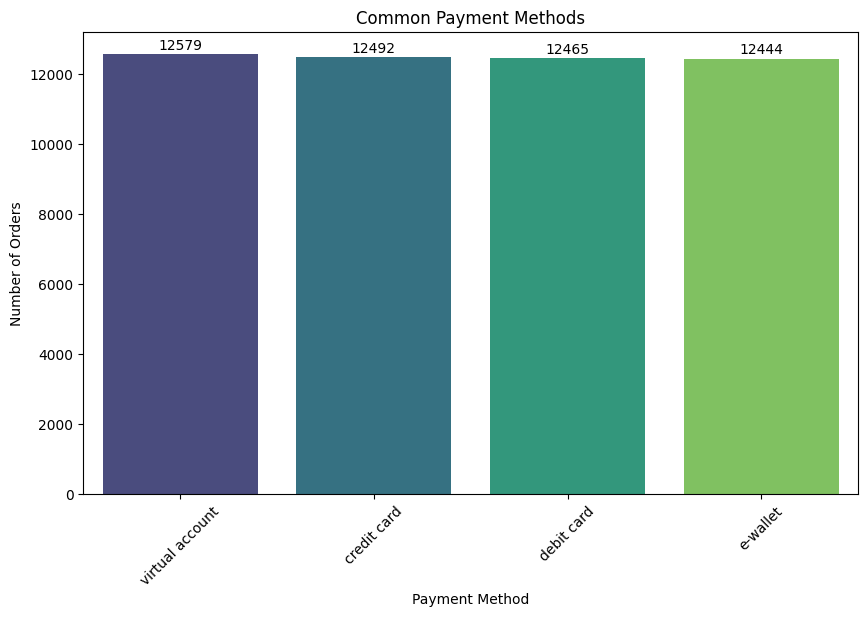

In [192]:
# Number of orders for each payment type
payment_type_counts = df['payment_type'].value_counts()
print("Number of payment types based on category:")
print(payment_type_counts)

# Plot payment methods
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')

# Annotate each bar with the count
for index, value in enumerate(payment_method_counts.values):
    ax.text(index, value + 50, str(value), ha='center', va='bottom')

plt.title('Common Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Number of products sold by category:
product_category_name
toys           6373
electronics    6298
automotive     6284
fashion        6272
beauty         6222
gadget         6217
sports         6187
utilities      6127
Name: count, dtype: int64


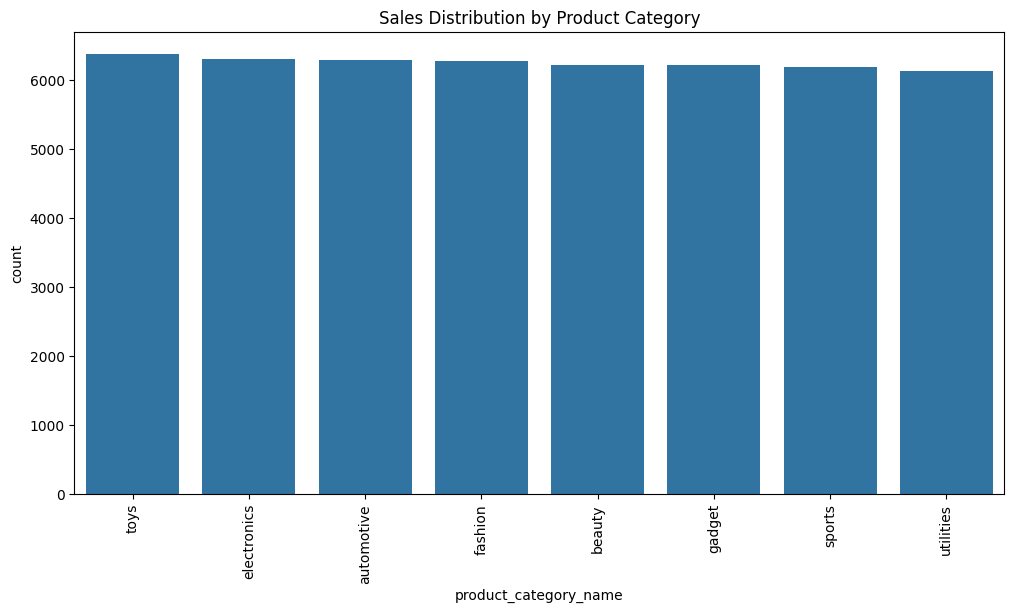

In [193]:
# Number of orders for each product category
product_category_counts = df['product_category_name'].value_counts()
print("Number of products sold by category:")
print(product_category_counts)

# Plot Sales distribution by product category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='product_category_name', order=df['product_category_name'].value_counts().index)
plt.title('Sales Distribution by Product Category')
plt.xticks(rotation=90)
plt.show()

# Data Visualization

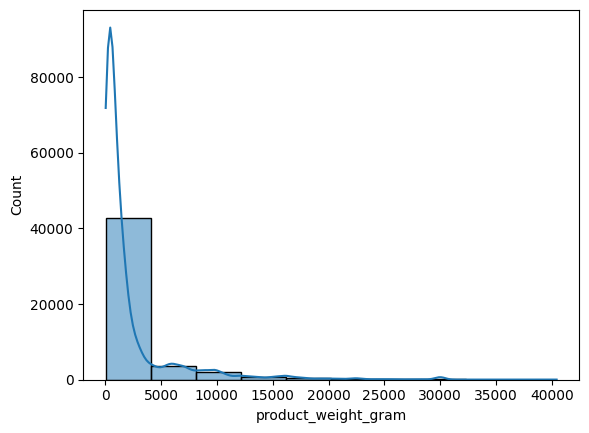

In [194]:
# Histogram for product weight distribution
sns.histplot(df['product_weight_gram'], bins=10, kde=True)
plt.show()

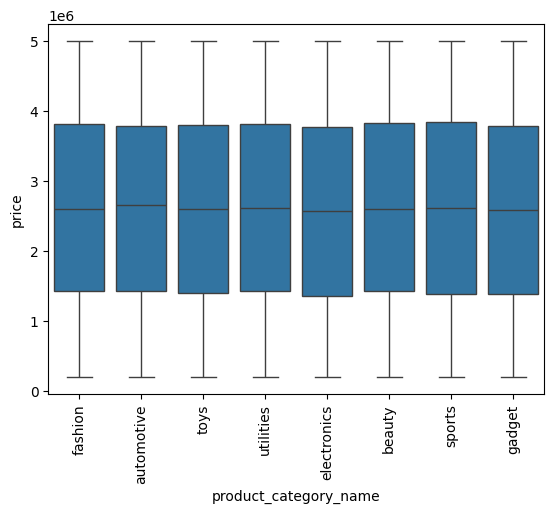

In [195]:
# Boxplot of product category over price
sns.boxplot(x='product_category_name', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

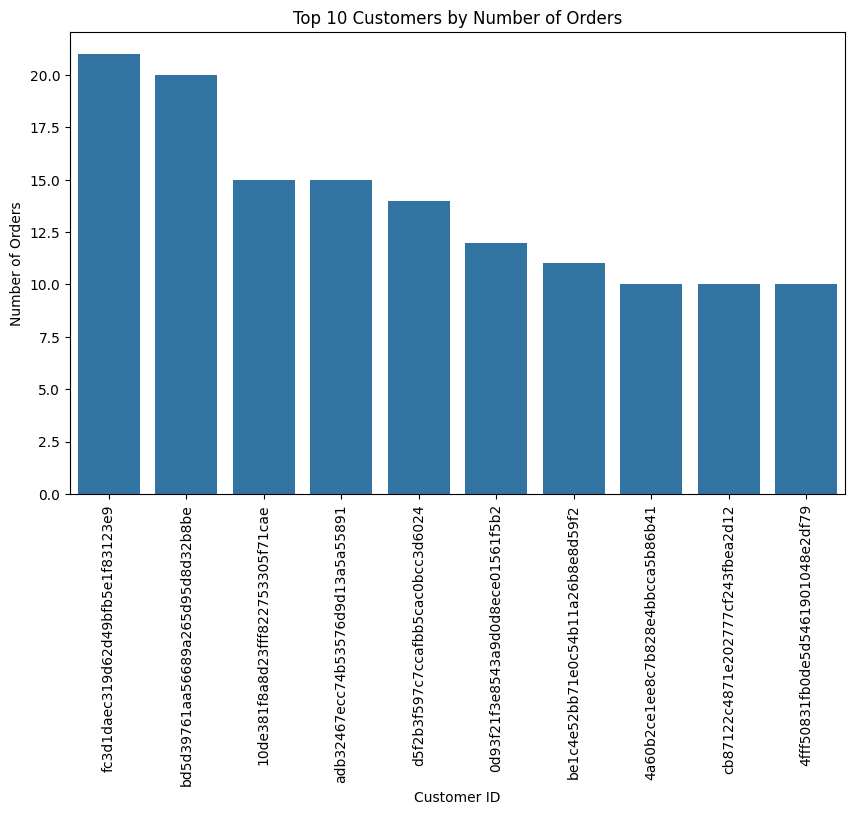

In [196]:
# Plot the top 10 customers by number of orders
top_customers = df['customer_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.show()

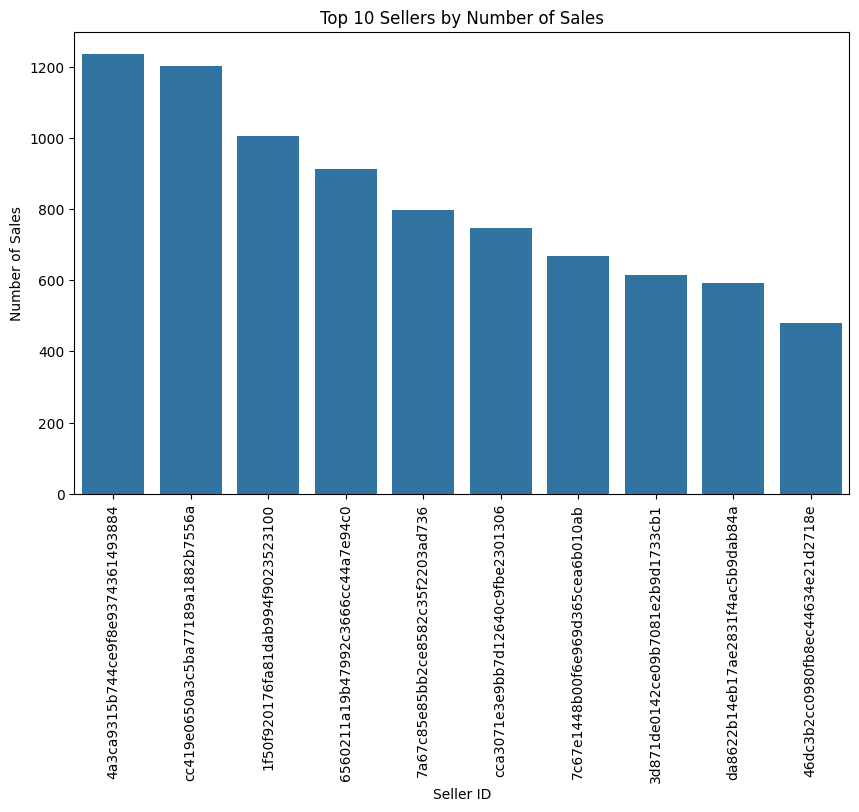

In [197]:
# Plot the top 10 sellers by number of sales
top_sellers = df['seller_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sellers.index, y=top_sellers.values)
plt.title('Top 10 Sellers by Number of Sales')
plt.xlabel('Seller ID')
plt.ylabel('Number of Sales')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.show()

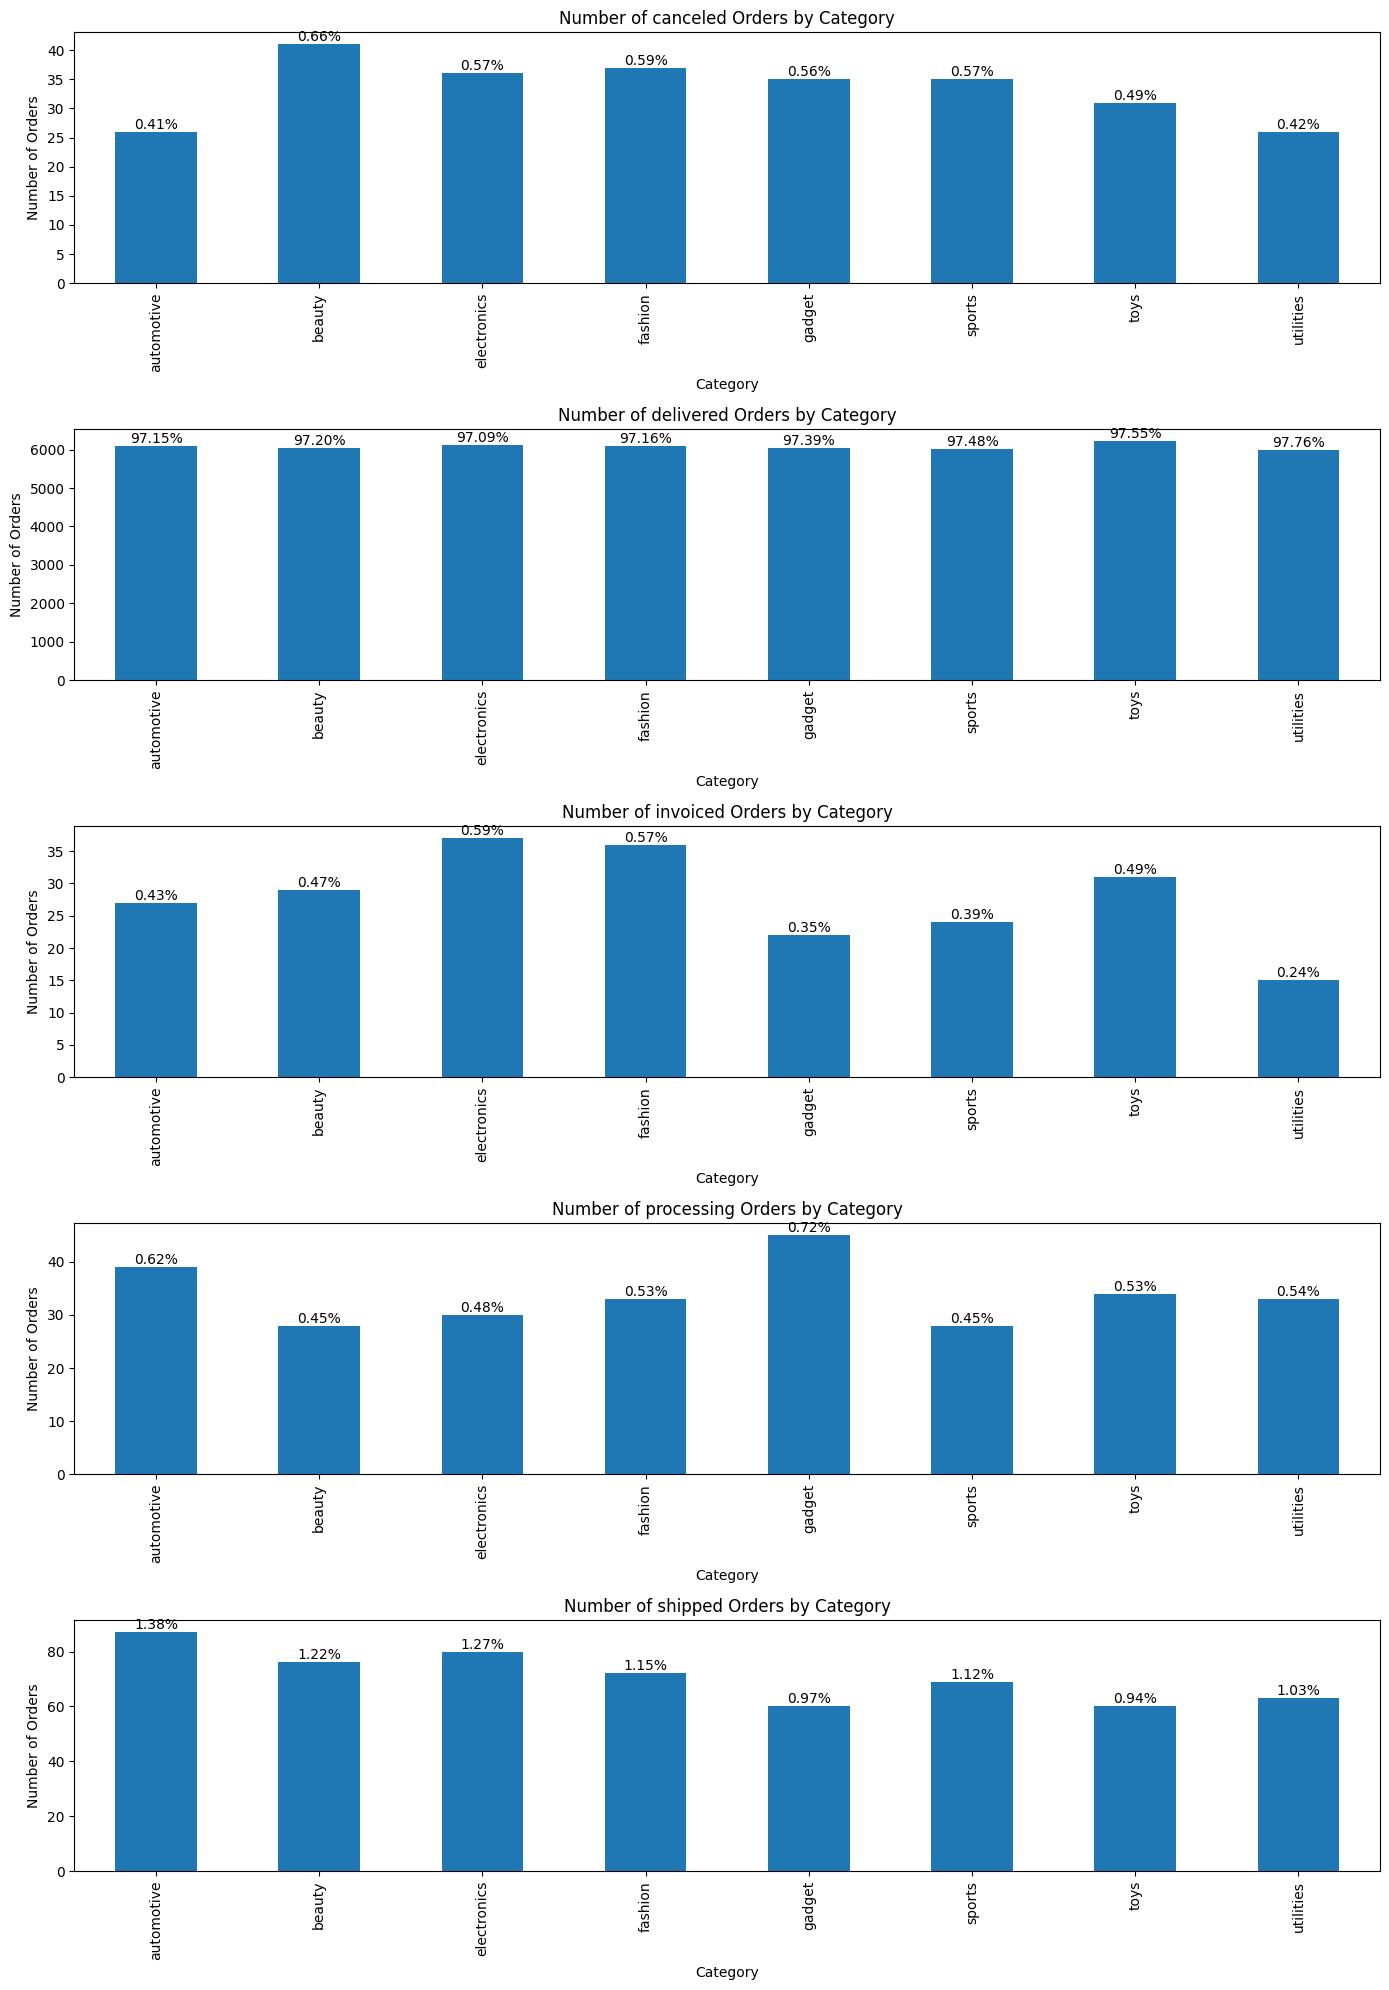

In [198]:
# Filter out 'approved' and 'unavailable' order statuses
filtered_df = df[~df['order_status'].isin(['approved', 'unavailable'])]

# Group by category and order status
category_status = filtered_df.groupby(['product_category_name', 'order_status']).size().unstack(fill_value=0)

# Calculate total for each category
category_total = category_status.sum(axis=1)

# Calculate percentage for each category and status
category_status_percentage = category_status.divide(category_total, axis=0) * 100

# Create separate bar charts for each order status with percentages
order_statuses = category_status.columns

fig, axes = plt.subplots(nrows=len(order_statuses), ncols=1, figsize=(14, len(order_statuses) * 4))

for i, status in enumerate(order_statuses):
    ax = axes[i]
    category_status[status].plot(kind='bar', ax=ax)
    ax.set_title(f'Number of {status} Orders by Category')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Orders')
    
    # Add percentage above each bar
    for index, p in enumerate(ax.patches):
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{category_status_percentage.loc[category_status.index[index], status]:.2f}%',
                    (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()


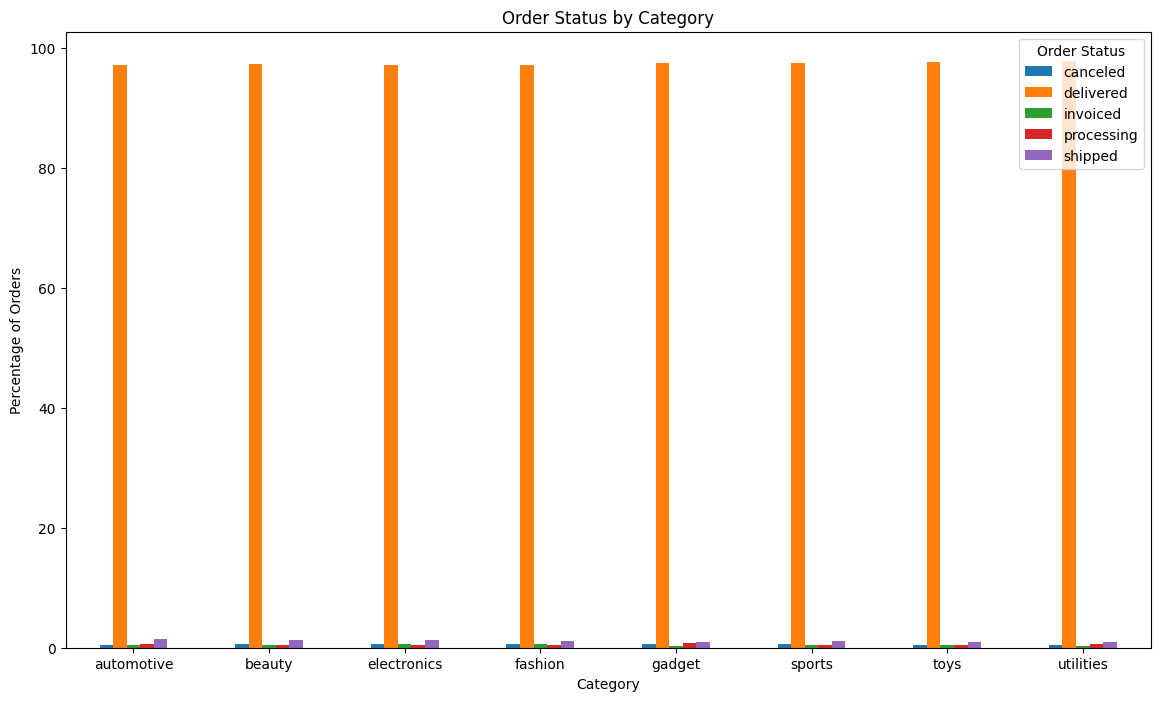

In [199]:
# Alternatively, create a grouped bar chart with percentages
category_status_percentage.plot(kind='bar', figsize=(14, 8))
plt.title('Order Status by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Orders')
plt.legend(title='Order Status')
plt.xticks(rotation=0)
plt.show()

# Correlation Analysis

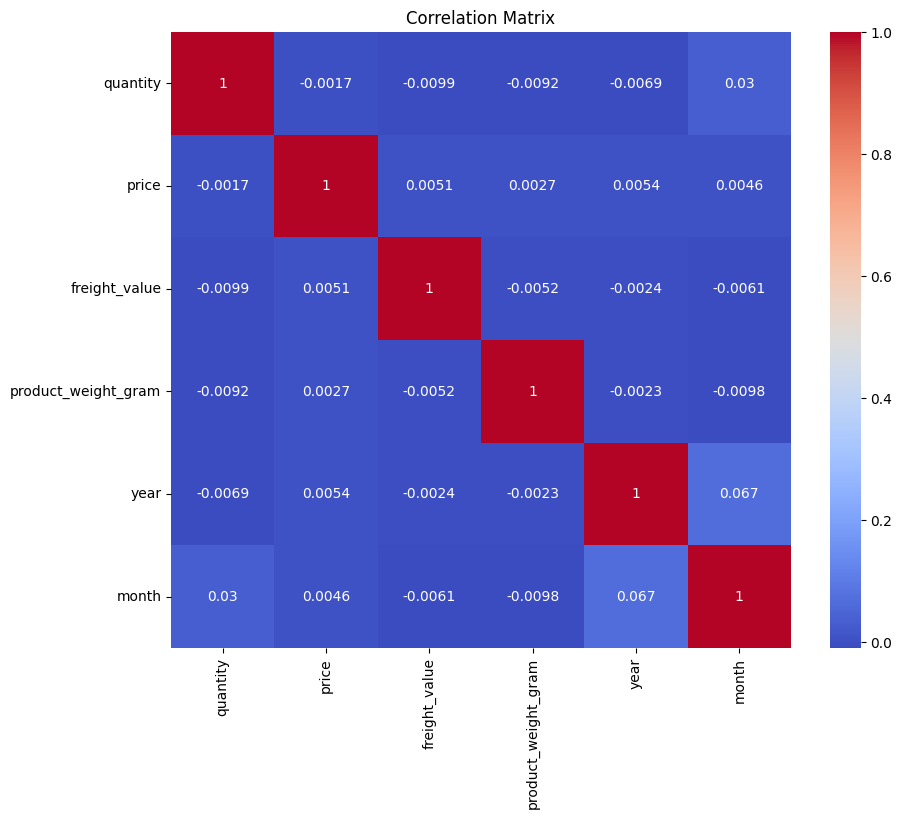

In [200]:
# Correlation Matrix

correlation_matrix = df.corr(numeric_only=True)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

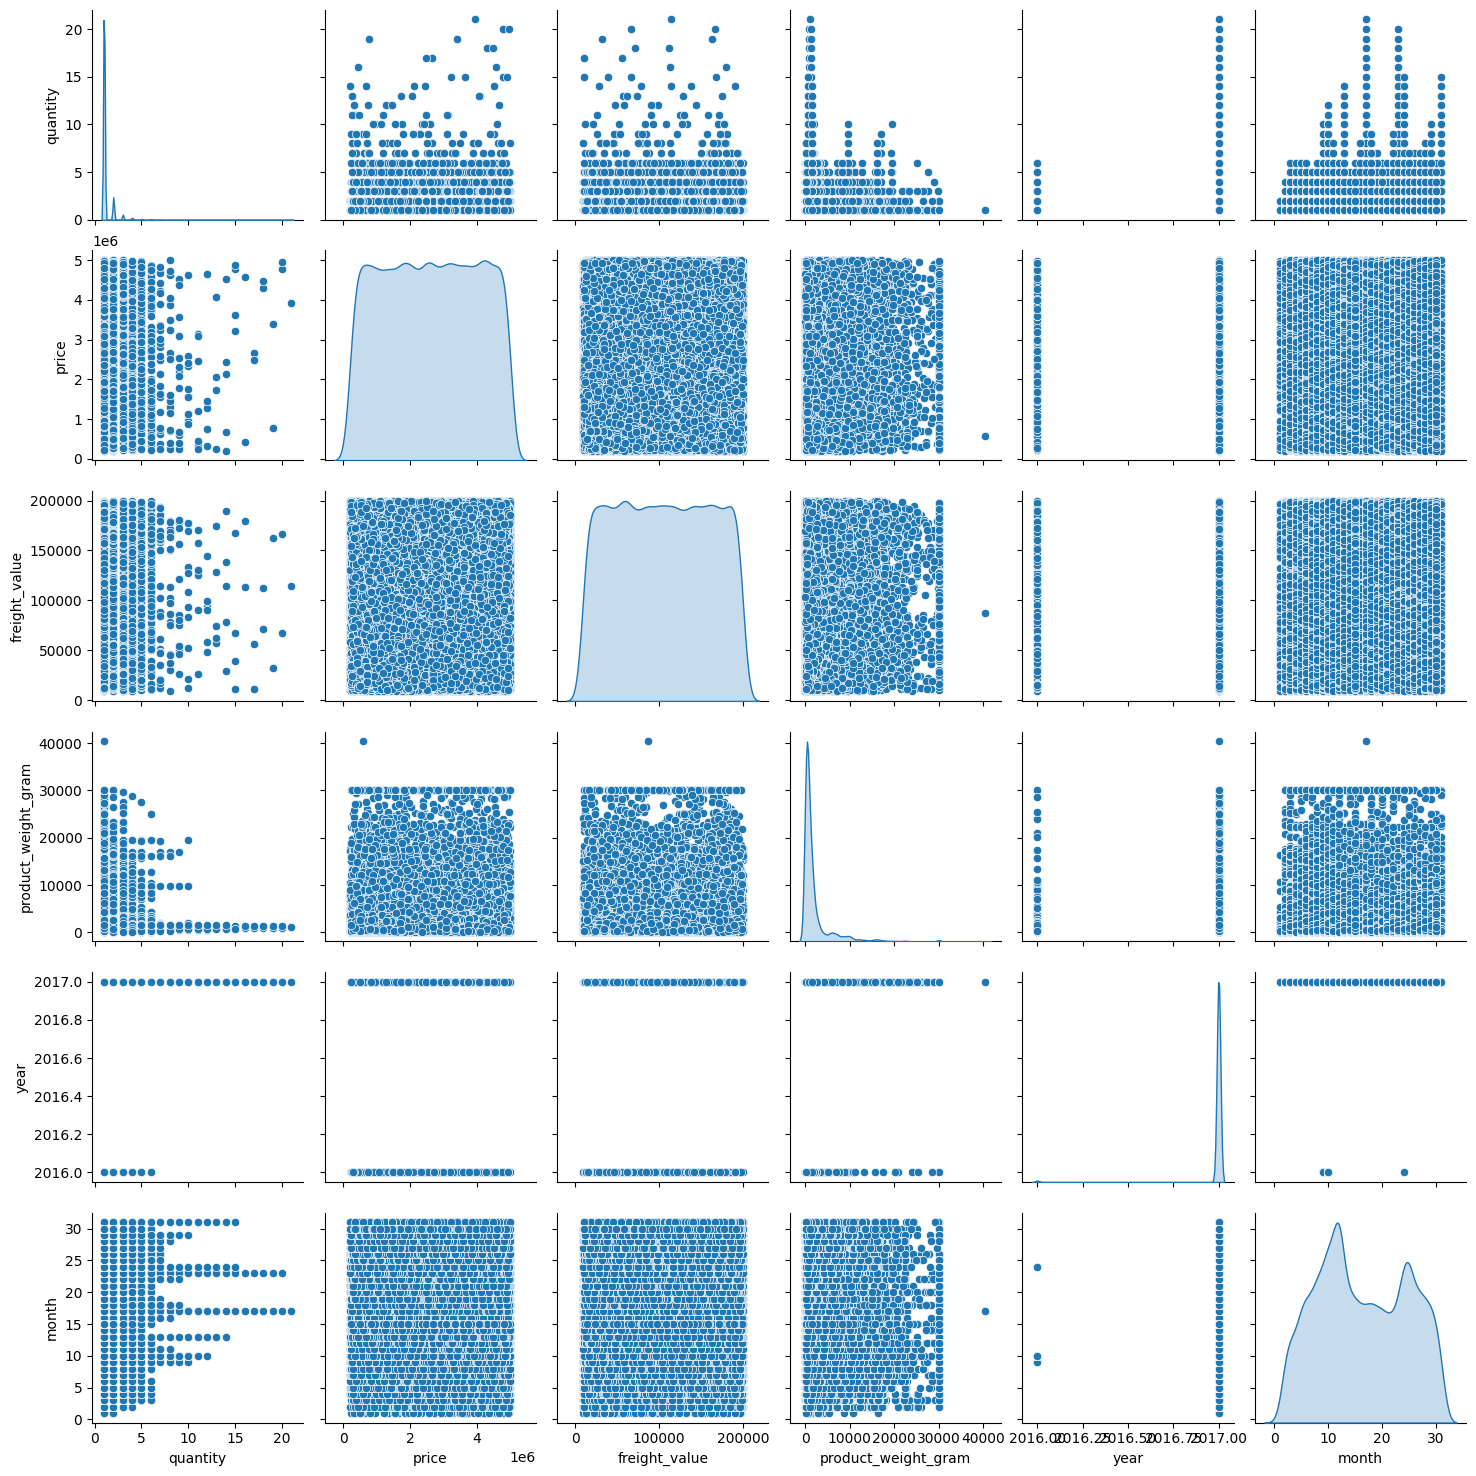

In [201]:
# Pairplot to visualize relationships between pairs of variables
sns.pairplot(df.select_dtypes(include=np.number), diag_kind='kde')
plt.show()

### Time plot

In [202]:
# Extract year and month from the column purchase date
df['YEAR'] = df['purchase_date'].dt.year
df['MONTH'] = df['purchase_date'].dt.day
# Combine 'YEAR' and 'MONTH' into a single column
df['YEAR_MONTH'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str).str.zfill(2)

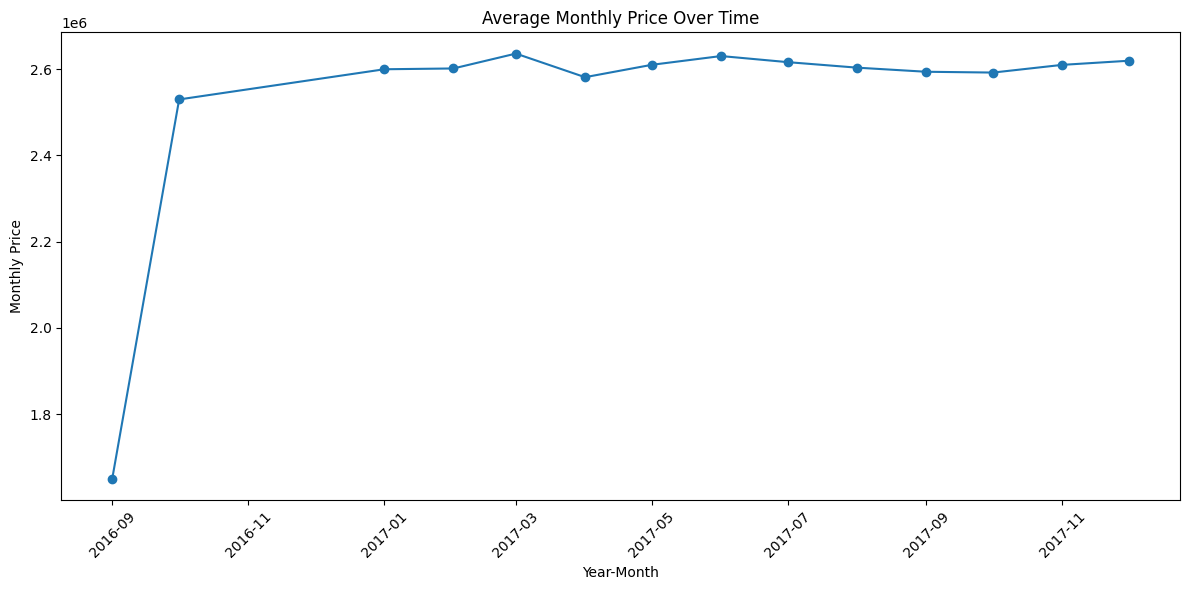

In [203]:
# Ensure the 'YEAR_MONTH' column is a string
df['YEAR_MONTH'] = df['YEAR_MONTH'].astype(str)

# Strip any unwanted characters that may be present after the month
df['YEAR_MONTH'] = df['YEAR_MONTH'].str.slice(0, 7)

# Now convert 'YEAR_MONTH' to datetime
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'], format='%Y-%m', errors='coerce')

# Group data by 'YEAR_MONTH' and calculate the average price
average_price_per_month = df.groupby('YEAR_MONTH')['price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(average_price_per_month['YEAR_MONTH'], average_price_per_month['price'], marker='o')

# Set plot title and labels
plt.title('Average Monthly Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel

# Show the plot
plt.show()